In [9]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv('mail_data.csv')

In [11]:
df.sample(6)


,Category,Message
1099,ham,NO GIFTS!! You trying to get me to throw mysel...
3008,ham,Ah you see. You have to be in the lingo. I wil...
899,ham,"Thursday night? Yeah, sure thing, we'll work i..."
2845,ham,Today iZ Yellow rose day. If u love my frndshi...
3979,ham,Reason is if the team budget is available at l...
2001,ham,But i'll b going 2 sch on mon. My sis need 2 t...


In [12]:
df.shape

(5572, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder=LabelEncoder()

In [16]:
df['Category']=encoder.fit_transform(df['Category'])

In [17]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [19]:
df.duplicated().sum()

415

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.sample(7)

,Category,Message
3350,0,Oh is it! Which brand?
2129,0,Well I'm going to be an aunty!
4902,0,Taka lor. Wat time u wan 2 come n look 4 us?
1645,0,India have to take lead:)
1865,0,You call him now ok i said call him
958,0,Welp apparently he retired
3443,1,Save money on wedding lingerie at www.bridal.p...


In [22]:
df.shape

(5157, 2)

In [23]:
##EDA


In [24]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

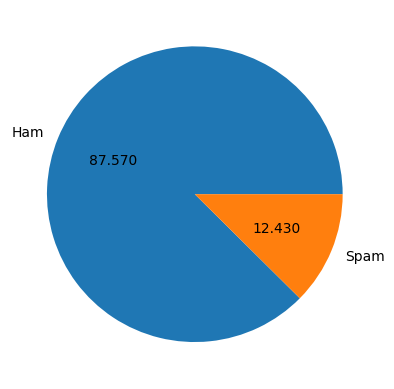

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['Ham','Spam'],autopct="%0.3f")
plt.show()
##by here we can see data is much imbalanced

In [26]:
##we can find out the number of characters, words and sentences used in sms

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shreyasi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
##make three columns
##no. chars
df['chars']=df['Message'].apply(len)


In [30]:
df.head()

,Category,Message,chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
##no. words
df['words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,Category,Message,chars,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['sentence']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Category,Message,chars,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['chars','words','sentence']].describe()

,chars,words,sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
##ham
df[df['Category']==0][['chars','words','sentence']].describe()

,chars,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
##spam
df[df['Category']==1][['chars','words','sentence']].describe()

,chars,words,sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='chars', ylabel='Count'>

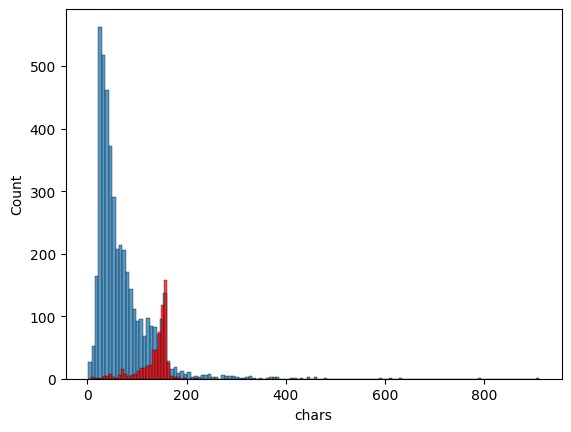

In [39]:
sns.histplot(df[df['Category']==0]['chars'])
sns.histplot(df[df['Category']==1]['chars'],color='red')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   int32 
 1   Message   5157 non-null   object
 2   chars     5157 non-null   int64 
 3   words     5157 non-null   int64 
 4   sentence  5157 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 221.6+ KB


In [41]:
df_num=df.select_dtypes(include=[np.number])

In [42]:
df_num.corr()

,Category,chars,words,sentence
Category,1.000000,0.374409,0.255968,0.259023
chars,0.374409,1.000000,0.966155,0.622428
words,0.255968,0.966155,1.000000,0.679396
sentence,0.259023,0.622428,0.679396,1.000000


<Axes: >

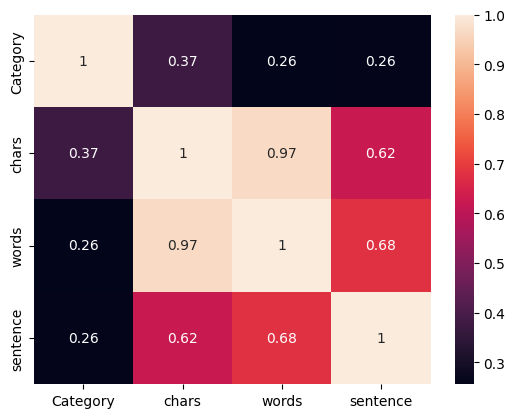

In [43]:
sns.heatmap(df_num.corr(), annot=True)

In [44]:
##data pre processing 
##lower case, tokenization, removing special char and stop words and punctuations, stemming

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string
nltk.download('stopwords')

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) 
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))        
    
    return " ".join(y) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreyasi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
transform_text('Ok lar... Joking wif u oni...')

'ok lar joke wif u oni'

In [47]:
df['Message'][1]

'Ok lar... Joking wif u oni...'

In [48]:
df['transformed_text']=df['Message'].apply(transform_text)

In [49]:
df.head(10)

,Category,Message,chars,words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [50]:
from wordcloud import WordCloud
wc=WordCloud(width=750, height=550, min_font_size=11, background_color='white')

In [51]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=" "))

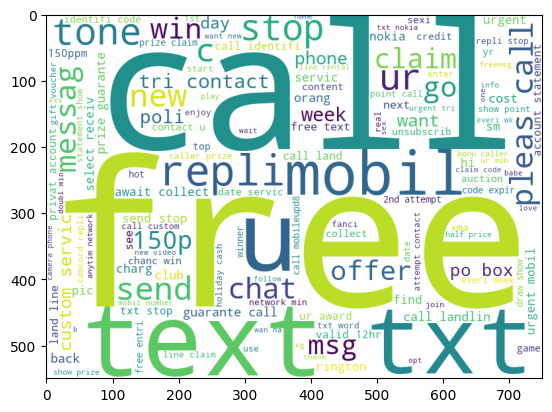

In [52]:

plt.imshow(spam_wc)

In [53]:
ham_wc=wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=" "))

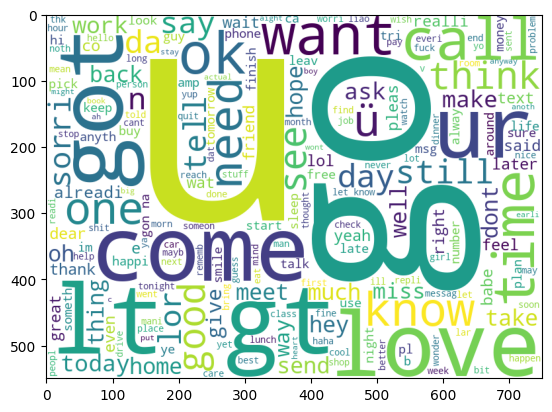

In [54]:
plt.imshow(ham_wc)

In [55]:
##custom code to see only the top50 words ham and spam 

In [56]:
spam_corpus=[]
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)


9781

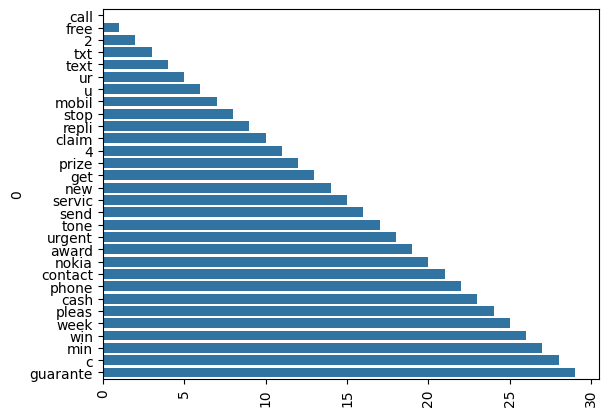

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()


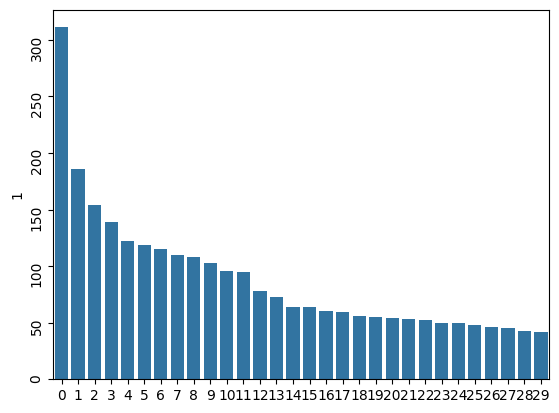

In [59]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.yticks(rotation='vertical')
plt.show()


In [60]:
ham_corpus=[]
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35940

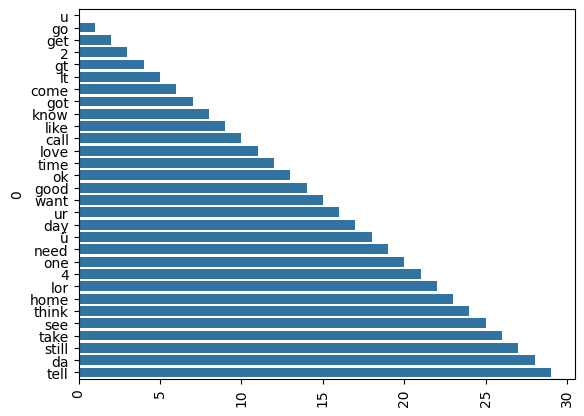

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()


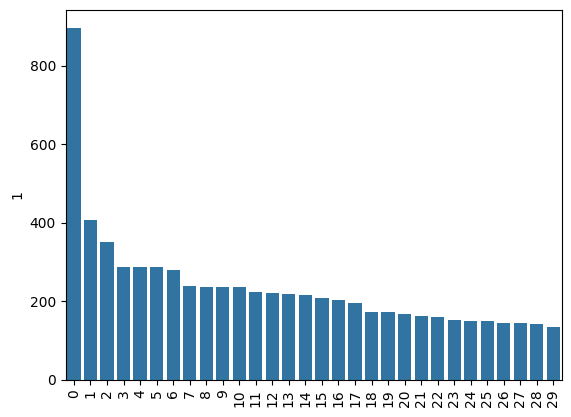

In [63]:

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [64]:
##model Building- Naive bayes as textual data works better in naive bayes

In [65]:
 df.head()

,Category,Message,chars,words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
#model Building
#first with Naive Bayes
#vectorize the text
#we need to convert in numerical input or vectorizing is done
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [67]:
X= tfidf.fit_transform(df['transformed_text']).toarray()


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X=scaler.fit_transform(X)

In [69]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
X.shape

(5157, 3000)

In [71]:
y=df['Category'].values


In [72]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8653100775193798
[[782 123]
 [ 16 111]]
0.47435897435897434


In [78]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
##at second, by applying tfidf this is giving the best result so far

0.9815891472868217
[[903   2]
 [ 17 110]]
0.9821428571428571


In [79]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
##at first,by applying CountVectorizer this was guving the best result.we take this as precision score what matters here as well as accuracy is score good too 

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [80]:
##as precision score matters here thats why we choose tfidf-->mnb

In [81]:
##to know bettr which algorithm is working the best we need to check all the model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier




In [83]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
nb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)


In [92]:
##clf--> classifiers
clfs={
    'SVC':svc,
    'KNC':knc,
    'NB':nb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [93]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [94]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9680232558139535, 0.9272727272727272)

In [101]:
#a loop to runover every model and store their result 
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    try:
        current_accuracy, current_precision= train_classifier(clf, X_train,y_train,X_test,y_test)
        print("For", name)
        print("Accuracy:", current_accuracy)
        print("precision:", current_precision)
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
    except KeyboardInterrupt:
        print(f"Training interrupte for {name}, moving to the next classifier.")
        continue

For SVC
Accuracy: 0.9680232558139535
precision: 0.9272727272727272
For KNC
Accuracy: 0.9108527131782945
precision: 1.0
For NB
Accuracy: 0.9815891472868217
precision: 0.9821428571428571
For DT
Accuracy: 0.9486434108527132
precision: 0.8363636363636363
For LR
Accuracy: 0.9641472868217055
precision: 0.9591836734693877
For RF
Accuracy: 0.9728682170542635
precision: 1.0
For AdaBoost
Accuracy: 0.9273255813953488
precision: 0.8421052631578947
For BgC
Accuracy: 0.9612403100775194
precision: 0.8918918918918919
For ETC
Accuracy: 0.9777131782945736
precision: 0.9905660377358491
For GBDT
Accuracy: 0.9554263565891473
precision: 0.9764705882352941
For xgb
Accuracy: 0.9728682170542635
precision: 0.9714285714285714


In [102]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [103]:
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.910853,1.000000
5,RF,0.972868,1.000000
8,ETC,0.977713,0.990566
2,NB,0.981589,0.982143
9,GBDT,0.955426,0.976471
10,xgb,0.972868,0.971429
4,LR,0.964147,0.959184
0,SVC,0.968023,0.927273
7,BgC,0.961240,0.891892
6,AdaBoost,0.927326,0.842105


In [104]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [105]:
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.910853
1,RF,Accuracy,0.972868
2,ETC,Accuracy,0.977713
3,NB,Accuracy,0.981589
4,GBDT,Accuracy,0.955426
5,xgb,Accuracy,0.972868
6,LR,Accuracy,0.964147
7,SVC,Accuracy,0.968023
8,BgC,Accuracy,0.961240
9,AdaBoost,Accuracy,0.927326


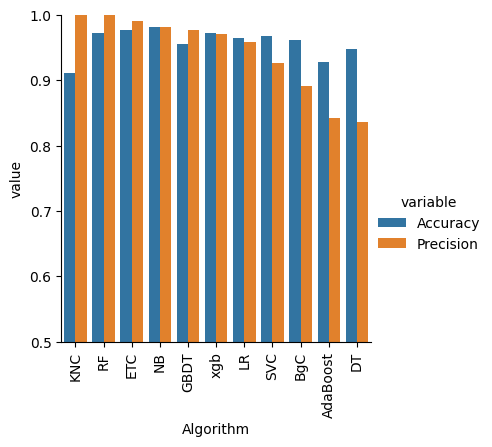

In [106]:
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1,kind='bar',height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [107]:
##model imprv needed
##changing the max_features hidden paramter of Tfidf

In [108]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000': precision_scores})

In [109]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling': precision_scores})

In [110]:
new_df=performance_df.merge(temp_df, on='Algorithm')

In [111]:
new_df_scaled=new_df.merge(temp_df, on='Algorithm')

In [112]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KNC,0.910853,1.000000,0.910853,1.000000,0.910853,1.000000
1,RF,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
2,ETC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
3,NB,0.981589,0.982143,0.981589,0.982143,0.981589,0.982143
4,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
5,xgb,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429
6,LR,0.964147,0.959184,0.964147,0.959184,0.964147,0.959184
7,SVC,0.968023,0.927273,0.968023,0.927273,0.968023,0.927273
8,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892
9,AdaBoost,0.927326,0.842105,0.927326,0.842105,0.927326,0.842105


In [113]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))